In [1]:
# sklearn inbuilt datasets
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import shap

In [2]:
dataset = datasets.fetch_california_housing()
X = dataset.data
y = dataset.target

# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature names
feature_names = dataset.feature_names

In [3]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
# Using ANN for classification
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


/home/aria/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - loss: 5735.7290 - val_loss: 11.1369
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 10.6216 - val_loss: 4.8733
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 4.6740 - val_loss: 2.8842
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 3.3797 - val_loss: 2.1225
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 1.7112 - val_loss: 2.9927
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 1.5300 - val_loss: 1.2763
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 1.2902 - val_loss: 1.2248
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 1.0939 - val_loss: 0.9946
Epoch 9/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 1.0327 - val_loss: 1.0282
Epoch 10/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 1.1500 - val_loss: 0.9126


In [15]:
# Predict SHAP values
explainer = shap.KernelExplainer(model.predict, shap.sample(X_train, 100))
# Kernel Explainer is used for deep learning models as it is computationally expensive to calculate SHAP values for deep learning models

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [17]:
shap_values = explainer.shap_values(X_test[:50])
# idea behind SHAP values is to calculate the contribution of each feature to the prediction of each sample
# for each sample, we have a SHAP value for each feature. We do this by calculating the difference between the prediction with the feature and without the feature
# SHAP values are calculated for each sample and each feature in the dataset
# this can be computation expensive for large training datasets, so we can instead sample a subset of the training data to calculate SHAP values


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [24]:
avg_shap_values = np.mean(np.abs(shap_values), axis=0)
avg_shap_values

array([[0.25893847],
       [0.22016463],
       [0.19089424],
       [0.00250829],
       [0.04541166],
       [0.02525484],
       [0.13381714],
       [0.02966301]])

In [50]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [39]:
shap_values = shap_values.reshape(X_test[:50].shape[0],-1)

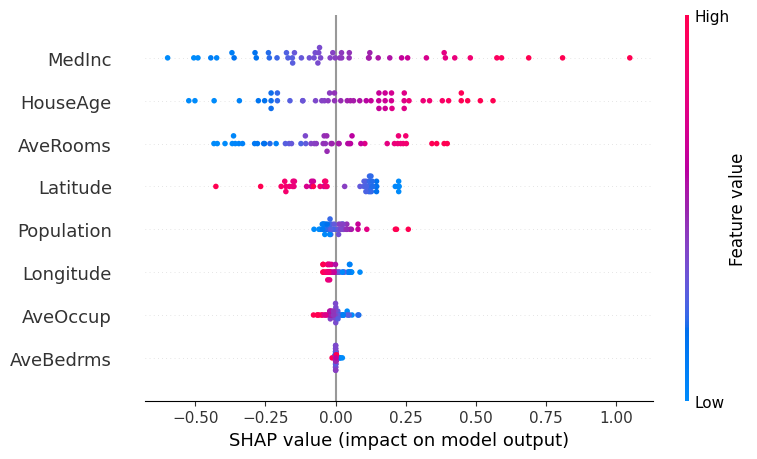

In [40]:
# plot SHAP values
shap.summary_plot(shap_values, X_test[:50], feature_names=np.array(feature_names))

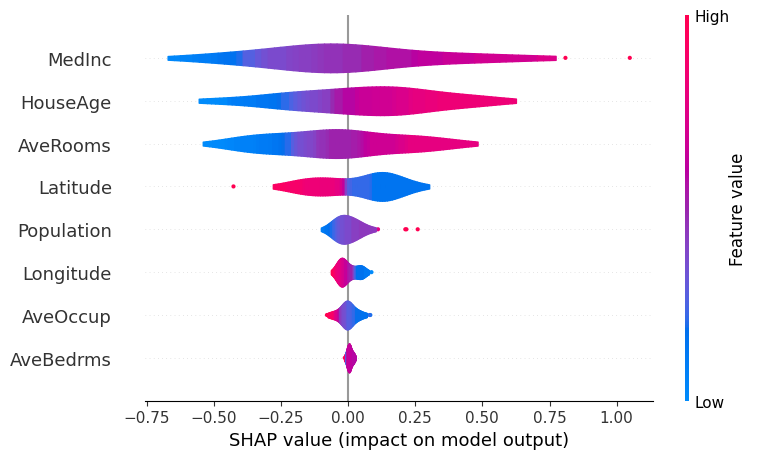

In [45]:
shap.summary_plot(shap_values, X_test[:50], feature_names=np.array(feature_names), plot_type='violin')

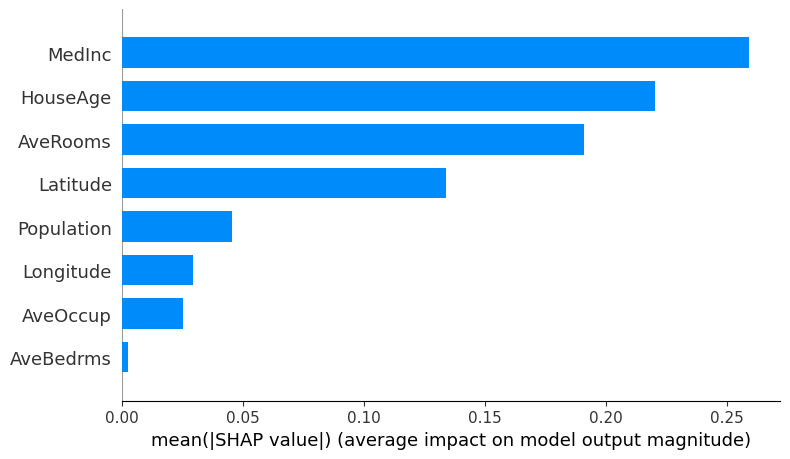

In [46]:
shap.summary_plot(shap_values, X_test[:50], feature_names=np.array(feature_names), plot_type='bar')